In [1]:
import numpy as np
import pandas as pd
import theano
from keras.models import Sequential,Model
from keras.layers import Dropout ,Activation,AveragePooling2D, normalization,Convolution2D,MaxPooling2D
from keras.layers import Dense, Flatten, Reshape, Input
from keras.layers.merge import add
from keras import optimizers
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN 5005)
Using Theano backend.


In [2]:
x = pd.read_csv('/home/vasu/all_projects/ML/MNIST/mnist_kaggle/train.csv')

In [3]:
X = np.array(x)
x = X[:,1:]
y = X[:,0]
print x.shape,y.shape

(42000, 784) (42000,)


In [4]:
x = x/255.0

In [5]:
x = x.reshape((X.shape[0], 28, 28,1))
y = np_utils.to_categorical(y)

In [6]:
inp = Input(shape=(28,28,1))
x1 = Convolution2D( 32,(3,3))(inp)

r1_a1 = Activation('relu')(x1)
r1_w1 = Convolution2D(32,( 3,3),padding='same')(r1_a1)
r1_a2 = Activation('relu')(r1_w1)
r1_d1 = Dropout(0.2)(r1_a2)
r1_w2 = Convolution2D(32,( 3,3),padding='same')(r1_d1)

x2 = Convolution2D(16,( 3,3))(r1_w2)

r2_a1 = Activation('relu')(x2)
r2_w1 = Convolution2D(16,( 3,3),padding='same')(r2_a1)
r2_a2 = Activation('relu')(r2_w1)
r2_d1 = Dropout(0.2)(r2_a2)
r2_w2 = Convolution2D(16,( 3,3),padding='same')(r2_d1)

x3 = Convolution2D(8,( 3,3))(r2_w2)
acti = Activation('relu')(x3)
av_pool = MaxPooling2D((2,2))((acti))
f1 = Flatten()(av_pool)
fc1 = Dense(32)(f1)
a1 = Activation('relu')(fc1)
fc3 = Dense(10)(a1)
a3 = Activation('softmax')(fc3)

model = Model(outputs=a3, inputs=inp)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        9248      
__________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
hist = model.fit(x, y,epochs = 20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 136s - loss: 0.5397 - acc: 0.8286 - val_loss: 0.1391 - val_acc: 0.9575
Epoch 2/20
33600/33600 [==============================] - 135s - loss: 0.1317 - acc: 0.9610 - val_loss: 0.1060 - val_acc: 0.9651
Epoch 3/20
33600/33600 [==============================] - 130s - loss: 0.0879 - acc: 0.9739 - val_loss: 0.0657 - val_acc: 0.9787
Epoch 4/20
33600/33600 [==============================] - 132s - loss: 0.0661 - acc: 0.9804 - val_loss: 0.0600 - val_acc: 0.9789
Epoch 5/20
33600/33600 [==============================] - 130s - loss: 0.0558 - acc: 0.9835 - val_loss: 0.0545 - val_acc: 0.9824
Epoch 6/20
33600/33600 [==============================] - 136s - loss: 0.0508 - acc: 0.9844 - val_loss: 0.0473 - val_acc: 0.9842
Epoch 7/20
33600/33600 [==============================] - 131s - loss: 0.0428 - acc: 0.9862 - val_loss: 0.0533 - val_acc: 0.9826
Epoch 8/20
33600/33600 [========================

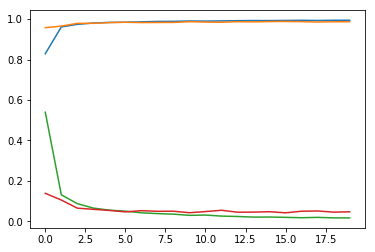

In [9]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])